In [1]:
import sys 
sys.path.append('./../../src')

# python shit
from datetime import datetime

# my shit
from lib.finnhub.data import FinnhubData as finnhub
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [2]:
ticker = 'WFC'

fh = finnhub()
data = fh.get_historical_data(ticker, fh.get_daily_closings, days = 180)

data.index = data['t']
data.sort_index()
data.drop_duplicates()

,t,o,l,h,c,v
t,,,,,,
2020-09-14 20:00:00,2020-09-14 20:00:00,24.80,24.830,24.800,24.84,1144087
2020-09-15 20:00:00,2020-09-15 20:00:00,24.80,24.890,24.870,24.97,2643026
2020-09-16 20:00:00,2020-09-16 20:00:00,25.50,25.700,25.680,25.71,1384318
2020-09-17 20:00:00,2020-09-17 20:00:00,25.02,25.100,25.080,25.71,1025013
2020-09-18 20:00:00,2020-09-18 20:00:00,25.00,25.110,25.060,25.13,66566397
...,...,...,...,...,...,...
2021-03-08 21:00:00,2021-03-08 21:00:00,38.57,38.690,38.660,38.74,3180410
2021-03-09 21:00:00,2021-03-09 21:00:00,38.02,38.170,38.130,38.17,2859317
2021-03-10 21:00:00,2021-03-10 21:00:00,39.56,39.610,39.700,39.70,1842003


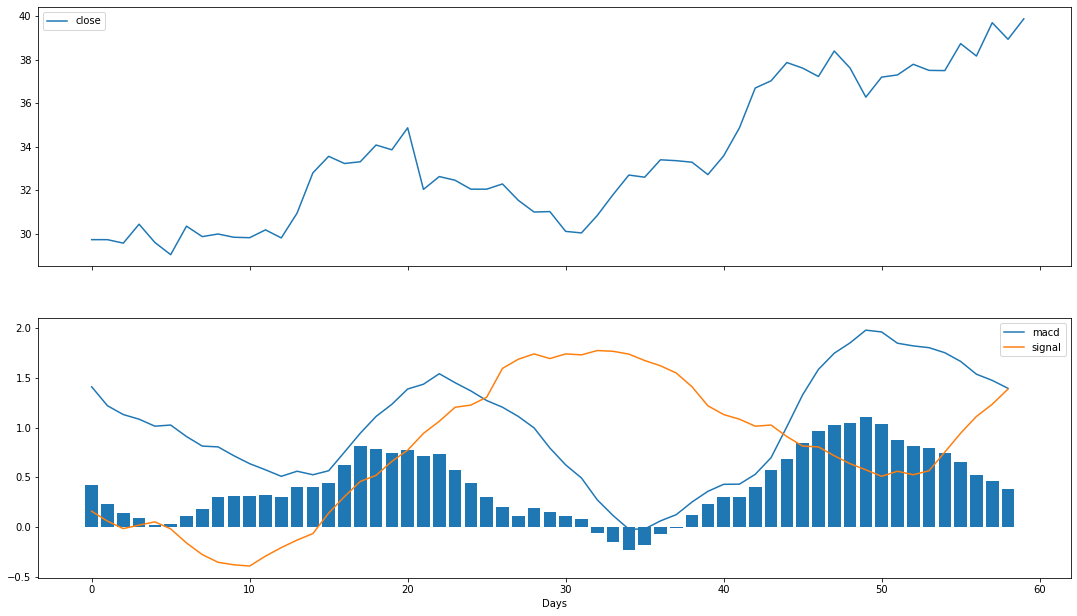

In [3]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)

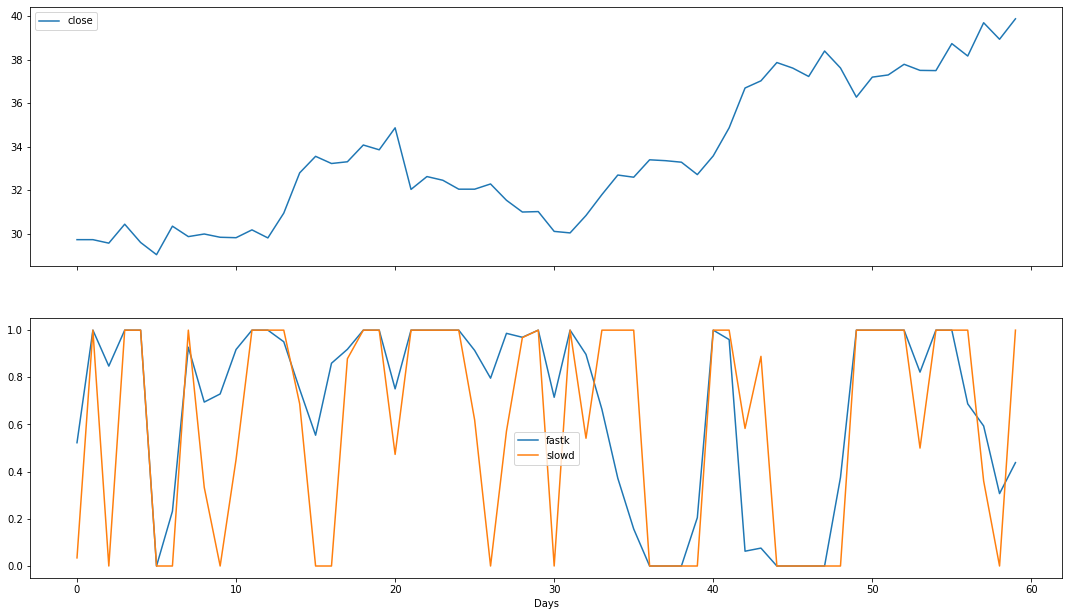

In [4]:
stochastic_vals = stochastic_over_period(list(data['c']), days)

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)